In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

import matplotlib.pyplot as plt 
import datetime as dt
import matplotlib.dates as mdates

# Определение перспективного тарифа для телеком компании

Пропишем функции

In [7]:
dataC = pd.read_csv('/datasets/calls.csv') #звонки
dataI = pd.read_csv('/datasets/internet.csv') #интернет
dataM = pd.read_csv('/datasets/messages.csv') #смс
dataT = pd.read_csv('/datasets/tariffs.csv') #данные тарифа
dataU = pd.read_csv('/datasets/users.csv') #данные пользователя

In [8]:
def ne_null(name_tabel, tariff):
    '''функция которая берет таблицу помесячную и выискивает все ненулевые значения,
    а потом считает десперсию, среднее и отклонение'''
    name_tabel.columns = name_tabel.columns.astype(str)
    slovar_tarif = {1:'Тариф - Смарт', 2:'Тариф - Ультра'}
    name = []
    srez = name_tabel.loc[name_tabel['tariff'] == tariff]
    srez = srez.loc[:, '1' : '11'].reset_index(drop=True)
    dl = len(srez)
    srez = srez.T
    srez = srez.astype('int')
    name_table_new = []
    for i in range(1,dl): 
          for j in range(len(srez[i])): 
                if srez[i][j] > 0:
                    name_table_new.append(srez[i][j])
    # дальше рассчитаем количество элементов не нулевых и общую сумму
    srez.loc['qq'] = srez.sum(axis = 0)
    sum_vsego = (srez.loc['qq'].sum())
    month = len(name_table_new)
    srednee = (sum_vsego/month).round(0)
    dispersia = (np.var(name_table_new, ddof = 1)).round(0)
    st_otklonenie = (np.std(name_table_new, ddof=1)).round(0)
    name.append(slovar_tarif[tariff])
    name.append(srednee)
    name.append(dispersia)
    name.append(st_otklonenie)
    return name


#print(oll_s)
def ne_null_cena(name_tabel, tariff):
    slovar_tarif = {1:'Тариф - Смарт', 2:'Тариф - Ультра'}
    name = []
    srez = name_tabel.reset_index(drop=True)
    dl = len(srez)
    srez = srez.T
    srez = srez.astype('int')
    name_table_new = []
    for i in range(1,dl): 
          for j in range(len(srez[i])): 
                if srez[i][j] > 0:
                    name_table_new.append(srez[i][j])
    # дальше рассчитаем количество элементов не нулевых и общую сумму
    srez.loc['qq'] = srez.sum(axis = 0)
    sum_vsego = (srez.loc['qq'].sum())
    month = len(name_table_new)
    srednee = (sum_vsego/month).round(0)
    dispersia = (np.var(name_table_new, ddof = 1)).round(0)
    st_otklonenie = (np.std(name_table_new, ddof=1)).round(0)
    name.append(slovar_tarif[tariff])
    name.append(srednee)
    name.append(dispersia)
    name.append(st_otklonenie)
    return name


def ne_null_table(name_tabel, tariff):
    '''Возвращаем список для гистограмм'''
    name_tabel.columns = name_tabel.columns.astype(str)
    srez = name_tabel.loc[name_tabel['tariff'] == tariff]
    srez = srez.loc[:, '1' : '11'].reset_index(drop=True)
    dl = len(srez)
    srez = srez.T
    srez = srez.astype('int')
    name_table_new = []
    for i in range(1,dl): 
          for j in range(len(srez[i])): 
                if srez[i][j] > 0:
                    name_table_new.append(srez[i][j])
    return name_table_new


def ne_null_table_c(name_tabel):
    '''Возвращаем список для гистограмм'''
    srez = name_tabel
    dl = len(srez)
    srez = srez.T
    srez = srez.astype('int')
    name_table_new = []
    for i in range(1,dl): 
          for j in range(len(srez[i])): 
                if srez[i][j] > 0:
                    name_table_new.append(srez[i][j])
    return name_table_new

Считаем данные, заполним неизвестные значения нулями. Переведем данные в правильный тип.

In [9]:
dataU['churn_date'] = dataU['churn_date'].fillna(0)
dataU['reg_date'] = pd.to_datetime(dataU['reg_date'], format = '%Y-%m-%d')
# заменим значение тарифор на числа smart - 1,  ultra - 2
dataU['tariff'] = dataU['tariff'].replace('ultra', '2')
dataU['tariff'] = dataU['tariff'].replace('smart', '1').astype(int)
# создадим столбцы с месяцем и датой регистрации
dataU['day'] = dataU['reg_date'].dt.day
dataU['day'] = dataU['day'].astype('float64')


#создадим отдельные таблицы - из таблицы о пользователе, которые мы сможем присоеденить к таблицам - звонки, смс и интернет#
tarif = dataU.loc[:, ['user_id', 'tariff']]
registr = dataU.loc[:, ['user_id', 'day']]


dataC['call_date'] = pd.to_datetime(dataC['call_date'], format = '%Y-%m-%d')
dataC = dataC.rename(columns={'call_date': 'time'})
dataC['duration_id'] = dataC['duration'].apply(lambda v: math.ceil(v))
dataC = dataC.merge(registr,on='user_id',how='left')

dataI['mb_used_id'] = dataI['mb_used'].apply(lambda v: math.ceil(v))
dataI['session_date'] = pd.to_datetime(dataI['session_date'], format = '%Y-%m-%d')
dataI = dataI.rename(columns={'session_date': 'time'})
dataI = dataI.merge(registr,on='user_id',how='left')


#print(dataM.info())
dataM['message_date'] = pd.to_datetime(dataM['message_date'], format = '%Y-%m-%d')
dataM = dataM.rename(columns={'message_date': 'time'})
dataM = dataM.merge(registr,on='user_id',how='left')
#print(dataM)


У нас есть значения звонков с длинной 0 - посмотрим как эти звонки распределены между пользователями.
Поскольку у нас прямая корреляция между количеством звонков пользователя и 0 звонками - то попробуем воссоздать 
для каждого пользователя распределение звонков исходя из его данных по звонкам и на основании этого - заполнить пропуски с 
помощью этого отношения.Какие плюсы у этого решения - распределение звонков по всей массе пользователей не измениться.
Какие минусы - если это решение не верное - у пользователя возможно будет переизбыток звонков и соответственно плата за них.

Если бы мы имели полные данные о пользователе с ценой за каждую операцию, таких проблем мы могли бы избежать - 
сразу понимать сколько оператор списал в итоге за звонок.

!!!P.S от этой идеи пришлось отказаться когда я не смогла заполнить готовыми списками с длинами звонков
значениями 0 у каждого пользователя(((

AxesSubplot(0.125,0.125;0.775x0.755)


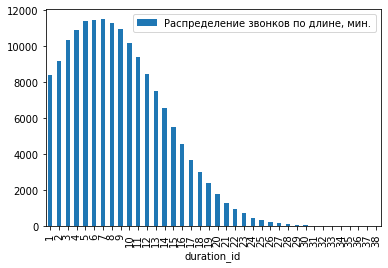

In [10]:
print(dataC.query('duration_id > 0').groupby('duration_id')['id'].count().plot(kind='bar',label = 'Распределение звонков по длине, мин.', legend = True))

wtf = dataC.loc[:, ['duration_id', 'user_id', 'id']]
cor = wtf.query('duration_id ==0').pivot_table(index = 'user_id', values = 'duration_id', aggfunc='count')
reg = wtf.query('duration_id !=0').pivot_table(index = 'user_id', values = 'duration_id', aggfunc='count')
cor['duration_id'].corr(reg['duration_id'])
# кореляция почти еденица -чем больше пользователь звонил, тем больше у него нулевых звонков в выписке. 
#Если бы в наших данных был столбец списаний за каждую операцию, мы могли бы точно сказать что это за звонок
dataC['duration_id_false'] = dataC['duration_id']
dataC['duration_id_false'] = dataC['duration_id_false'].replace(0, 1)
#решили заполнить эти звонки значением - 1 мин.


Если сгруппировать сообщения, смс и интернет нашей выборки в лоб – по месяцам то данные будут не верные. Потому что если человек купил тариф, например  в июле 27 числа – то в конце июля в нашей сводной таблице у него будет немного пользований, а основная масса уйдёт на август. И там вполне получиться перебор и переплата. А по факту его месяц пользования тарифа будет идти с 27 июля по 27 августа. И у каждого пользователя он разный.
Мой вариант решения проблемы: надо все даты использования смс, звонков и интернета подвинуть на срок его регистрации минус один день.
То есть, например он позвонил 27 июля, нам из этой даты нужно сделать 1 число. Тогда все вместиться именно так как нам надо, а потом уже берём месяц и делаем группировку.
Пишем функцию которая изменит даты.

In [11]:
def new_data(row):
    call_date = row['time']
    dayy = row['day'] -1
    timedelta = dt.timedelta(days = dayy)
    ee = call_date - timedelta
    return ee

dataC['new_time']  = dataC.apply(new_data, axis=1)
dataC['month'] = dataC['new_time'].dt.month
dataM['new_time']  = dataM.apply(new_data, axis=1)
dataM['month'] = dataM['new_time'].dt.month
dataI['new_time']  = dataI.apply(new_data, axis=1)
dataI['month'] = dataI['new_time'].dt.month


Теперь мы сможем по каждому пользователю, в разрезе каждого месяца видеть его звонки, смс и пользование интернетом.

In [12]:
tarif = dataU.loc[:, ['user_id', 'tariff']]
# создадим таблицы для динамики использования
#таблица звонков
call = (dataC.pivot_table(index = 'user_id', columns = 'month',
                          values = 'duration_id', aggfunc='sum').fillna(0)
       )
call['user_id'] = call.index.values
call = call.reset_index(drop=True)

#таблица смс
sms = dataM.pivot_table(index = 'user_id', columns = 'month', values = 'id', aggfunc='count').fillna(0)
sms['user_id'] = sms.index.values
sms = sms.reset_index(drop=True)

#таблица интернета
internet = dataI.pivot_table(index = 'user_id', columns = 'month', values = 'mb_used_id', aggfunc='sum').fillna(0)
internet['user_id'] = internet.index.values
internet = internet.reset_index(drop=True)


#теперь сделаем общую по каждому месяцу таблицу

oll= call.merge(sms,on='user_id',how='outer').merge(internet,on='user_id').merge(tarif, on='user_id',how='left').fillna(0).reset_index()
oll_smart = oll.query('tariff ==1')
oll_ultra = oll.query('tariff ==2')
#print(oll)
internet = internet.merge(tarif, on='user_id',how='left')
sms = sms.merge(tarif, on='user_id',how='left')
call = call.merge(tarif, on='user_id',how='left')
oll.head()

,index,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,4,5,6,7,8,9,10,11,12,tariff
0,0,0.0,0.0,0.0,0.0,299.0,284.0,403.0,482.0,368.0,...,0.0,17840.0,18744.0,11453.0,17159.0,15727.0,15511.0,8657.0,2401.0,2
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18452.0,14053.0,1
2,2,0.0,0.0,0.0,0.0,0.0,220.0,262.0,227.0,191.0,...,0.0,0.0,19297.0,16933.0,21165.0,12814.0,18252.0,17674.0,10048.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,938.0,851.0,...,0.0,0.0,0.0,0.0,11967.0,16436.0,16119.0,6822.0,5985.0,2
4,4,0.0,0.0,0.0,0.0,92.0,154.0,141.0,151.0,102.0,...,0.0,20622.0,19921.0,25357.0,22326.0,19164.0,15122.0,15973.0,10687.0,2


Создадим таблицу для пользователей тарифа - смарт. И посчитаем сколько они платили исходя из своих лимитов и трат.

In [13]:
oll_smart = oll.query('tariff ==1')
oll_s = oll_smart.loc[:,['user_id', 'tariff']].reset_index(drop=True)

for i in range(1, 12):
    """ Запихиваем все наши данные по звонкам , смс и интернету пользователей смарт в одну таблицу и вычитаем лимиты"""
    M = []
    M = oll_smart.loc[:, ['user_id', 'tariff', str(i)+'_x', str(i)+'_y', i]]
    M.columns = ['user_id', 'tariff', 'call', 'sms', 'internet']
    M['pr'] = ((M['call'] != 0) | (M['sms'] != 0) | (M['internet'] !=0))
    M['call_t'] = (M['call'] >500) & (M['call'] != 0)
    M['sms_t'] = M['sms'] >50
    M['internet_t'] = M['internet'] >15360 
    M['call_c'] = M['call_t'] * (M['call'] -500)*3 
    M['sms_c'] = M['sms_t'] * (M['sms']-50)*3
    M['internet_c'] = (M['internet'].apply(lambda v: math.ceil((v-15360)/1024)*200))*M['internet_t']
    M['cena'] = (500 + M['call_c'] + M['sms_c'] +M['internet_c'])*M['pr']
    it1 = M.loc[:, ['user_id', 'cena']].reset_index(drop=True)
    it1.columns = ['user_id', str(i)]
    oll_s= oll_s.merge(it1,on='user_id',how='outer')

    
oll_smart = oll_s.copy(deep=True)
del oll_s['tariff']
del oll_s['user_id']
oll_s

,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0
1,0.0,0.0,0.0,0.0,0.0,1300.0,900.0,1700.0,500.0,1100.0,1100.0
2,557.0,500.0,1289.0,614.0,905.0,761.0,839.0,566.0,1055.0,752.0,797.0
3,0.0,1100.0,500.0,500.0,500.0,700.0,1300.0,1100.0,1300.0,700.0,900.0
4,0.0,0.0,0.0,1763.0,500.0,862.0,1172.0,1056.0,946.0,500.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...
345,3633.0,2100.0,2710.0,1700.0,2313.0,1817.0,2585.0,2700.0,3300.0,3506.0,1109.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1248.0,500.0
347,0.0,0.0,0.0,0.0,0.0,0.0,2309.0,1500.0,2521.0,500.0,0.0
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,906.0,960.0,716.0


Создадим таблицу для пользователей тарифа - ультра. И посчитаем сколько они платили исходя из своих лимитов и трат.

In [14]:
oll_ultra = oll.query('tariff ==2')
oll_u = oll_ultra.loc[:,['user_id', 'tariff']].reset_index(drop=True)
#print(oll_ultra)
for i in range(1, 12):
    """ Запихиваем все наши данные по звонкам , смс и интернету в одну таблицу и вычитаем лимиты"""
    M = []
    M = oll_ultra.loc[:, ['user_id', 'tariff', str(i)+'_x', str(i)+'_y', i]]
    M.columns = ['user_id', 'tariff', 'call', 'sms', 'internet']
    M['pr'] = ((M['call'] != 0) | (M['sms'] != 0) | (M['internet'] !=0))
    M['call_t'] = (M['call'] >3000)
    M['sms_t'] = M['sms'] >1000
    M['internet_t'] = M['internet'] >30720 
    M['call_c'] = M['call_t'] * (M['call'] -3000)*1
    M['sms_c'] = M['sms_t'] * (M['sms']-1000)*1
    M['internet_c'] = (M['internet'].apply(lambda v: math.ceil((v-30720)/1024)*150))*M['internet_t']
    M['cena'] = (1950 + M['call_c'] + M['sms_c'] +M['internet_c'])*M['pr']
    it1 = M.loc[:, ['user_id', 'cena']].reset_index(drop=True)
    it1.columns = ['user_id', str(i)]
    oll_u= oll_u.merge(it1,on='user_id',how='outer')


#oll_u['user_id'] = oll_u.index.values
oll_ultra = oll_u.copy(deep=True)
del oll_u['tariff']
del oll_u['user_id']
oll_u

,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0
2,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
142,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
143,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
144,0.0,0.0,0.0,0.0,2550.0,1950.0,1950.0,3600.0,1950.0,1950.0,1950.0
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.0,2700.0


Мы считаем по 11 месяцев, потому что именно эти данные дают нам результат максимально приближенные к реальности. 

In [29]:
cena_ne_null_smart = ne_null_cena(oll_s,1)
cena_ne_null_ultra = ne_null_cena(oll_u,2)
print('БОЛЬШАЯ КРАСИВАЯ ТАБЛИЧКА')
print()
print('ЦЕНА')
print('Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.')
print('-----------------------------------------------------------------------')
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(cena_ne_null_smart[0], cena_ne_null_smart[1], cena_ne_null_smart[2], cena_ne_null_smart[3]))
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(cena_ne_null_ultra[0], cena_ne_null_ultra[1], cena_ne_null_ultra[2], cena_ne_null_ultra[3]))
print()
print('ЗВОНКИ')
print('Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.')
print('-----------------------------------------------------------------------')
cal_ne_null_smart = ne_null(call,1)
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(cal_ne_null_smart[0], cal_ne_null_smart[1], cal_ne_null_smart[2], cal_ne_null_smart[3]))
cal_ne_null_ultra = ne_null(call,2)
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(cal_ne_null_ultra[0], cal_ne_null_ultra[1], cal_ne_null_ultra[2], cal_ne_null_ultra[3]))
print()
print('СМС')
print('Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.')
print('-----------------------------------------------------------------------')
sms_ne_null_smart = ne_null(sms,1)
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(sms_ne_null_smart[0], sms_ne_null_smart[1], sms_ne_null_smart[2], sms_ne_null_smart[3]))
sms_ne_null_ultra = ne_null(sms,2)
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(sms_ne_null_ultra[0], sms_ne_null_ultra[1], sms_ne_null_ultra[2], sms_ne_null_ultra[3]))
print()
print('ИНТЕРНЕТ')
print('Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.')
print('-----------------------------------------------------------------------')
int_ne_null_smart = ne_null(internet,1)
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(int_ne_null_smart[0], int_ne_null_smart[1], int_ne_null_smart[2], int_ne_null_smart[3]))
int_ne_null_ultra = ne_null(internet,2)
print('{: <16} | {: >16.2f} | {: >14.2f} | {: >16.2f}'.format(int_ne_null_ultra[0], int_ne_null_ultra[1], int_ne_null_ultra[2], int_ne_null_ultra[3]))


БОЛЬШАЯ КРАСИВАЯ ТАБЛИЧКА

ЦЕНА
Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.
-----------------------------------------------------------------------
Тариф - Смарт    |          1334.00 |      656926.00 |           811.00
Тариф - Ультра   |          2109.00 |      173129.00 |           416.00

ЗВОНКИ
Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.
-----------------------------------------------------------------------
Тариф - Смарт    |           449.00 |       30532.00 |           175.00
Тариф - Ультра   |           593.00 |       83925.00 |           290.00

СМС
Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.
-----------------------------------------------------------------------
Тариф - Смарт    |            41.00 |         697.00 |            26.00
Тариф - Ультра   |            66.00 |        2143.00 |            46.00

ИНТЕРНЕТ
Название тарифа  | Среднее в месяц  |    Дисперсия   | Стандартное отк.
---------

Построим гистограммы распределения.

Text(0.5, 1.0, 'Звонки в месяц')

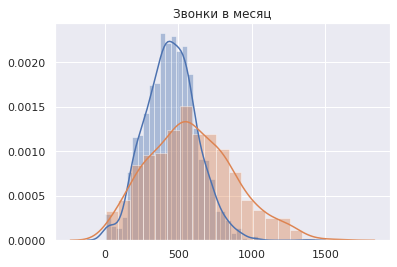

In [16]:
pr = ne_null_table(call,1)
sns.set(); np.random.seed(0)
ax = sns.distplot(pr)

pr2 = ne_null_table(call,2)
sns.set(); np.random.seed(0)
ax = sns.distplot(pr2, axlabel = None, label=True)
plt.title('Звонки в месяц')

Text(0.5, 1.0, 'Отправка смс в месяц')

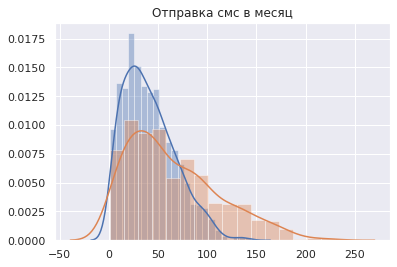

In [17]:
pr = ne_null_table(sms,1)
sns.set(); np.random.seed(0)
ax = sns.distplot(pr)

pr2 = ne_null_table(sms,2)
sns.set(); np.random.seed(0)
ax = sns.distplot(pr2, axlabel = None, label=True)
plt.title('Отправка смс в месяц')

Text(0.5, 1.0, 'Распределение интернет пользования между 2 тарифами')

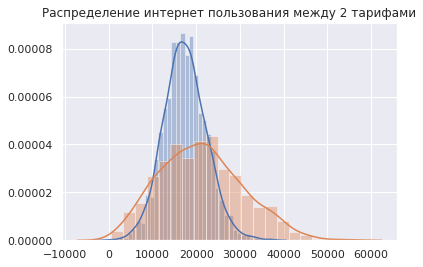

In [18]:
pr = ne_null_table(internet,1)
sns.set(); np.random.seed(0)
ax = sns.distplot(pr)

pr2 = ne_null_table(internet,2)
sns.set(); np.random.seed(0)
ax = sns.distplot(pr2, axlabel = None, label=True)
plt.title('Распределение интернет пользования между 2 тарифами')

Проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Text(0.5, 1.0, 'Распределение ежемесячной оплаты на тарифе Smart')

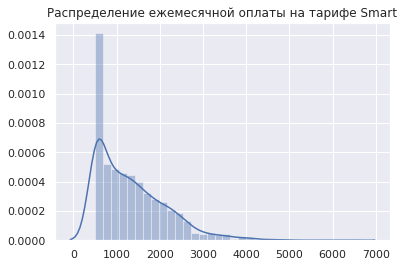

In [19]:
cena_S = ne_null_table_c(oll_s) #все оплаты по тарифу Смарт
sns.set();
ax = sns.distplot(cena_S, axlabel = None)
plt.title('Распределение ежемесячной оплаты на тарифе Smart')

Text(0.5, 1.0, 'Распределение ежемесячной оплаты на тарифе Ultra')

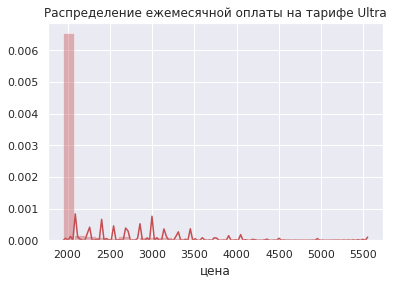

In [20]:
cena_U = ne_null_table_c(oll_u) #все оплаты по тарифу Ультра
sns.set(); 
ax = sns.distplot(cena_U, axlabel = 'цена', color = 'r')
plt.title('Распределение ежемесячной оплаты на тарифе Ultra')

на отдельных графиках не понятно. Построим Ящик с усами.

Text(0.5, 1.0, 'Средняя выручка пользователей тарифов')

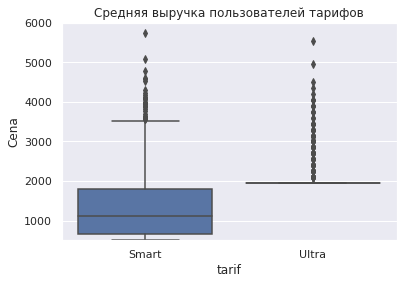

In [21]:
plt.ylim(500, 6000)
columns = ['Cena']
df = pd.Series(cena_S)
df1 = pd.Series(cena_U)
DF = pd.DataFrame(df,columns=columns)
DF['tarif'] = 'Smart'
DF1 = pd.DataFrame(df1,columns=columns)
DF1['tarif'] = 'Ultra'
new_t = pd.concat([DF, DF1], ignore_index=True)
sns.boxplot(x='tarif', y='Cena', data=new_t)
plt.title('Средняя выручка пользователей тарифов')

In [22]:
from scipy import stats as st
alpha = .05 

results = st.ttest_ind(cena_S,cena_U)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2617987195349006e-128
Отвергаем нулевую гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается


Проверим гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [24]:
city = dataU.loc[:, ['city', 'user_id']]
oll_ultra= oll_ultra.merge(city,on='user_id',how='left')
oll_smart= oll_smart.merge(city,on='user_id',how='left')
new = pd.concat([oll_ultra, oll_smart], ignore_index=True)
new_M = new.query('city == "Москва"')
srez_M = new_M.loc[:, '1' : '11'].reset_index(drop=True)
new_W = new.query('city != "Москва"')
srez_W = new_W.loc[:, '1' : '11'].reset_index(drop=True)

Text(0.5, 1.0, 'Средняя выручка для Москвы и регионов')

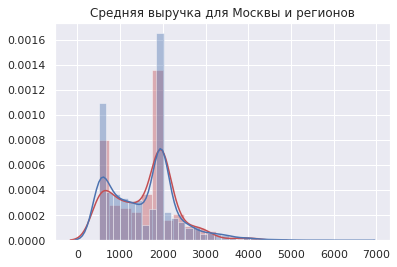

In [25]:
cena_M = ne_null_table_c(srez_M)
cena_W = ne_null_table_c(srez_W)
sns.set();
ax = sns.distplot(cena_M, color="r")
ax = sns.distplot(cena_W, axlabel = None, label=True, color="b")
plt.title('Средняя выручка для Москвы и регионов')

Text(0.5, 1.0, 'Средняя выручка для Москвы и регионов')

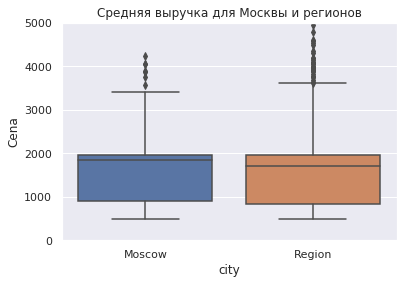

In [26]:
plt.ylim(0, 5000)
columns = ['Cena']
df = pd.Series(cena_M)
df1 = pd.Series(cena_W)
DF = pd.DataFrame(df,columns=columns)
DF['city'] = 'Moscow'
DF1 = pd.DataFrame(df1,columns=columns)
DF1['city'] = 'Region'
new_t = pd.concat([DF, DF1], ignore_index=True)
sns.boxplot(x='city', y='Cena', data=new_t)
plt.title('Средняя выручка для Москвы и регионов')

In [27]:
from scipy import stats as st
alpha = .05 

results = st.ttest_ind(cena_M,cena_W)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу- средняя выручка пользователей из Москвы не отличается от других пользователей")

p-значение: 0.44172731490756023
Не получилось отвергнуть нулевую гипотезу- средняя выручка пользователей из Москвы не отличается от других пользователей


# Выводы

Для клиента лучше тариф Смарт ( в среднем он платит - 1334.00 р.), для компании лучше продать Ультра (в среднем 2109.00 р.). Потому что при увеличении трат минут и интернета в тарифе Ультра процентов на 20-30, выручка у них увеличивается на 100%. Московские и региональные клиенты по тратам не различаются.